In [4]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import itertools 

faces1 = pd.read_csv("../../data_files/data_from_android_api/faces/faces1.csv")
faces2 = pd.read_csv("../../data_files/data_from_android_api/faces/faces2.csv")
faces3 = pd.read_csv("../../data_files/data_from_android_api/faces/faces3.csv")
faces4 = pd.read_csv("../../data_files/data_from_android_api/faces/faces4.csv")
faces5 = pd.read_csv("../../data_files/data_from_android_api/faces/faces5.csv")

dataDF = pd.concat([faces1, faces2, faces3, faces4, faces5])

In [5]:
# create an array of shape 30706, 9 = number of records by the features
data = np.array([[0 for x in range(8)] for y in range(len(dataDF))])
for i in range(len(dataDF)):
    data[i] = [dataDF.delta.values[i],
                       dataDF.theta.values[i],
                       dataDF.alphaLow.values[i],
                       dataDF.alphaHigh.values[i],
                       dataDF.betaLow.values[i],
                       dataDF.betaHigh.values[i],
                       dataDF.gammaLow.values[i],
                       dataDF.gammaMid.values[i]]
    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

encoder = LabelBinarizer()
encoder = LabelEncoder()
labels = encoder.fit_transform(dataDF.action.values)

# creating training and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, random_state=42)
print(x_train.max())
print(x_train.min())

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

all_labels = dataDF.action.values

all_data = dataDF.drop(['action'], axis=1)

16777099
48


/Users/darrenmoriarty/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
from keras.utils import np_utils
# convert integers to dummy variables (i.e. one hot encoded)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [7]:
encoder.inverse_transform([np.argmax(y_test[8], axis=0)])

array(['down'], dtype=object)

In [8]:
y_test[:20]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

[1., 0., 0., 0., 0.], down
[0., 1., 0., 0., 0.], left
[0., 0., 1., 0., 0.], rest
[0., 0., 0., 1., 0.], right
[0., 0., 0., 0., 1.], up

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_22 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_23 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_24 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 85        
Total params: 3,925
Trainable params: 3,925
Non-trainable params: 0
_________________________________________________________________
Train on 1304 samples, validate on 326 samples
Epoch 1/50
1304/1304 [==============================] - 1s 1ms/step - loss: 1.6041 - acc: 0.2

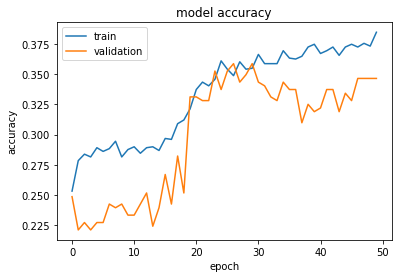

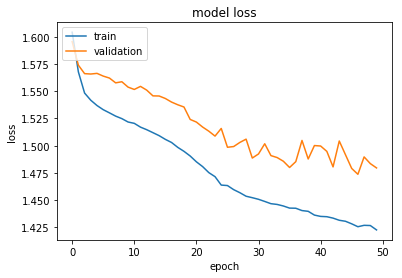

In [38]:
from keras import models
from keras import layers
# from keras import regularizers kernel_regularizer=regularizers.l2(0.01), 
from keras.optimizers import Adam

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(16, input_shape=(8,)))
    model.add(layers.Dense(32, activation="relu"))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(16, activation="softmax"))
    model.add(layers.Dense(5, activation='softmax'))
    return model

network = build_model()

# Adam = Adam(lr=0.05)
network.compile(optimizer=Adam(lr=0.00038),
                loss='categorical_crossentropy',
                metrics=['acc'])
network.summary()

history = network.fit(x_train, y_train,
                      validation_split=0.2,
                      epochs=50, verbose=1, batch_size=2)

loss_and_metrics = network.evaluate(x_test, y_test)
print('loss and metrics', loss_and_metrics)

%matplotlib inline 
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [32]:
y_pred = network.predict(x_test)

In [33]:
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [34]:
matrix

array([[14,  4, 67,  6, 10],
       [10, 21, 20, 20, 49],
       [ 8,  5, 82,  7, 19],
       [11, 17, 26, 12, 37],
       [ 4, 22, 11,  4, 58]])

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("noralized confusion matrix")
    else:
        print('confusion matrix without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')


In [36]:
my_labels = ['down', 'left', 'rest', 'right', 'up']

confusion matrix without normalization
[[14  4 67  6 10]
 [10 21 20 20 49]
 [ 8  5 82  7 19]
 [11 17 26 12 37]
 [ 4 22 11  4 58]]


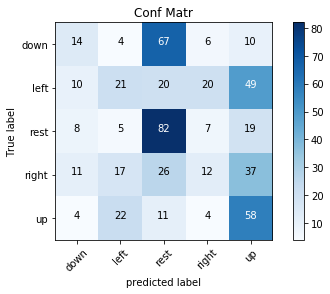

In [37]:
plot_confusion_matrix(matrix, my_labels, title='Conf Matr')

In [101]:
[1., 0., 0., 0., 0.], down
[0., 1., 0., 0., 0.], left
[0., 0., 1., 0., 0.], rest
[0., 0., 0., 1., 0.], right
[0., 0., 0., 0., 1.], up

NameError: name 'down' is not defined

In [ ]:
import keras_metrics

network = build_model()

# Adam = Adam(lr=0.05)
network.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=[keras_metrics.precision(), keras_metrics.recall()])

network.summary()

history = network.fit(x_train, y_train,
                      epochs=100, verbose=1, batch_size=2)

loss_and_metrics = network.evaluate(x_test, y_test)
print('loss and metrics', loss_and_metrics)

%matplotlib inline 
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['precision'])
plt.title('Model accuracy')
plt.ylabel('precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['recall'])
plt.title('recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['precision'])
plt.title('precision')
plt.ylabel('precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['recall'])
plt.title('recall')
plt.ylabel('precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()